In [121]:
# State Tax Collections http://www2.census.gov/govs/statetax/14staxcd.txt
# Geo Data http://download.geonames.org/export/dump/
# Subsidized Households 2008 http://www.HUDuser.org/portal/picture2008/2008_tract.zip
# Zip Codes https://www.aggdata.com/node/86
# Unemployment Rates http://www.bls.gov/lau/laucntycur14.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
sal = pd.read_csv('../Data/salaries_parent.csv')
sal.shape

(1444, 152)

In [123]:
sal.head(5)

,Zip,B19013_001,no_male_hs_p,no_female_hs_p,at_least_hs_male_p,at_least_hs_female_p,at_least_bach_male_p,at_least_bach_female_p,male_unemployment,female_unemployment,...,T51,T53,T99,Place Name,State_y,State Abbreviation,County,Latitude,Longitude,Unnamed: 60
0,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
1,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
2,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
3,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
4,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN


In [124]:
sal.mean()

Zip                                                               5.465744e+04
B19013_001                                                        4.768131e+04
no_male_hs_p                                                      9.085053e+00
no_female_hs_p                                                    8.216080e+00
at_least_hs_male_p                                                9.091495e+01
at_least_hs_female_p                                              9.178392e+01
at_least_bach_male_p                                              4.441843e+01
at_least_bach_female_p                                            4.946938e+01
male_unemployment                                                 6.126710e+00
female_unemployment                                               5.986530e+00
snap                                                              1.092064e+01
renter                                                            5.686790e+01
median_rent                                         

In [125]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]
sal2.shape

(1412, 153)

In [126]:
sal2.mean()

Zip                                                               5.445178e+04
B19013_001                                                        4.753726e+04
no_male_hs_p                                                      8.709738e+00
no_female_hs_p                                                    8.205198e+00
at_least_hs_male_p                                                9.129026e+01
at_least_hs_female_p                                              9.179480e+01
at_least_bach_male_p                                              4.492534e+01
at_least_bach_female_p                                            4.949808e+01
male_unemployment                                                 6.185822e+00
female_unemployment                                               6.009028e+00
snap                                                              1.096319e+01
renter                                                            5.689759e+01
median_rent                                         

In [127]:
sal2.fillna(sal2.mean(), inplace=True)
sal2.isnull().values.any()

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


True

In [128]:
# list of X vars to include
# X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsInPosition', 
#          'yearsInProfession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instBudget', 'instSize']
# X_numeric = sal2[X_numeric_features]
# X_categorical_features = ['Function', 'gender', 'race', 'highestDegree', 'Category', 'instType']
# X_categorical = sal2[X_categorical_features]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_numeric = sal2.select_dtypes(include=numerics)
X_categorical = sal2.select_dtypes(exclude=numerics)
X_categorical.shape

(1412, 17)

In [129]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [130]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

# Function_dummies = pd.get_dummies(X_categorical['Function'])
# gender_dummies = pd.get_dummies(X_categorical['gender'])
# race_dummies = pd.get_dummies(X_categorical['race'])
# highestDegree_dummies = pd.get_dummies(X_categorical['highestDegree'])
# Category_dummies = pd.get_dummies(X_categorical['Category'])
# instType_dummies = pd.get_dummies(X_categorical['instType'])

# X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# # convert to ndarray
# X_dummy_features = X_dummy_features.as_matrix()

In [131]:
X_dummy_features = []
for i in X_categorical.columns:
    temp_dummies = pd.get_dummies(X_categorical[i])
    X_dummy_features.append(temp_dummies)
X_dummy_features = pd.concat(X_dummy_features, axis=1)
# X_dummy_features.shape
X_dummy_features = X_dummy_features.as_matrix()


In [132]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)


In [133]:
# y is salary
y = sal2.iloc[:, 98].values
print(y)

[ 77308.  70863.  56557. ...,  49088.  32000.  32000.]


In [134]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [135]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [136]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 1.60071067512e-09
Coefficients: 
 [  5.38503800e-11  -1.83929308e-10  -1.47415791e-10   7.24428226e-11
  -3.63307107e-10  -1.35733674e-10  -1.04721676e-10  -2.25890140e-10
  -1.59351199e-10   1.69453987e-10  -1.87742884e-10  -1.72721165e-10
  -2.37154747e-10  -1.26674439e-10  -1.36398512e-10  -1.07127265e-10
  -1.42845842e-10  -1.58777199e-10  -9.87564255e-11  -1.60848906e-10
   9.02056208e-17  -1.18820094e-10  -2.83269757e-10  -1.92166778e-10
  -1.53965684e-10  -1.47613754e-10  -4.15024112e-11  -1.26045078e-10
   3.16329598e-11   1.49126679e-11  -7.63535598e-11   7.63537220e-11
  -8.20403606e-11  -7.78353178e-11  -1.59670501e-10  -2.18095971e-11
  -1.31709786e-11  -1.92717818e-10  -2.24083137e-11  -3.71040906e-12
   3.71040427e-12   3.02019461e-11  -3.02019379e-11  -4.25335208e-11
  -3.64124598e-12   2.33820995e-10  -2.51051731e-11  -4.40086744e-11
   2.62520535e-11   5.20951407e-11   1.12744795e-11  -6.59495171e-11
  -2.32430940e-11   4.21354642e-11   2.69127077e-11   2.

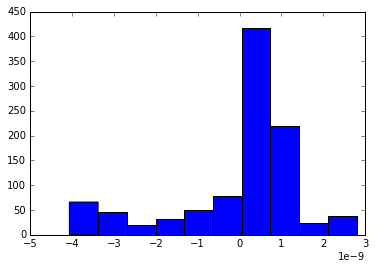

Distribution of prediction error on test data:


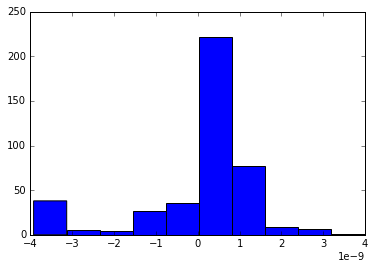

In [137]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [138]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [139]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)

Intercept: 
 14182.6167731
Coefficients: 
 [  3.71802816e+01   8.05318401e+01  -2.88244200e+01 ...,   2.25679032e-04
   5.08111840e-04  -2.41019436e-04]
Residual sum of squares, training data: 0.00
Residual sum of squares, test data: 16912180.80
Variance score, training data: 1.00
Distribution of prediction error on training data:


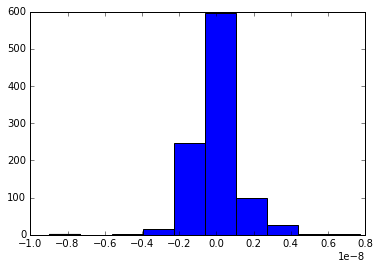

Distribution of prediction error on test data:


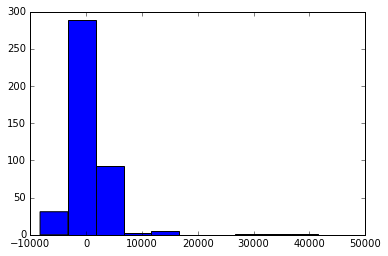

In [140]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 2.25794065045e-06
Coefficients: 
 [  1.54536390e-07  -3.96123566e-08  -5.01274747e-08  -2.41014380e-08
   1.78756312e-08   1.03245173e-07  -8.20774174e-08  -9.27539306e-08
  -5.51221662e-08   3.53509704e-08  -1.27849981e-08  -2.64549391e-08
  -7.76675310e-08  -9.29308772e-08  -1.10899451e-08   8.40675986e-09
  -5.67535340e-08  -1.22984509e-07  -3.22813073e-08  -5.34748454e-08
   0.00000000e+00   4.90058036e-08  -4.26645644e-08   2.88780749e-08
  -6.12408661e-08  -2.80428865e-08   1.64706649e-08  -8.32673750e-08
  -3.25908639e-08  -4.28443904e-08   7.85477404e-09  -7.96185252e-09
   2.04142425e-09   4.80569170e-08  -3.16919818e-08   4.56754186e-08
  -5.00972603e-08  -1.13299350e-08   1.96234995e-08  -3.16281604e-08
   3.04453538e-08  -3.34439899e-09   3.25668662e-09  -1.43177776e-08
   3.77446109e-09   1.45471003e-07   7.61392432e-08  -9.45103270e-08
  -1.68960161e-08   7.73411342e-09   3.98677081e-09   2.97930854e-09
   1.43438240e-09   1.11796925e-09  -9.40300288e-09  -1.

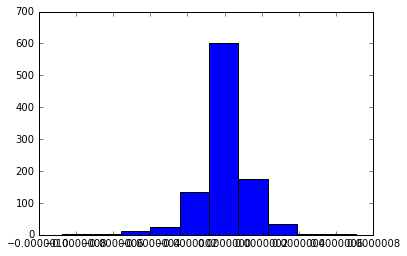

Distribution of prediction error on test data:


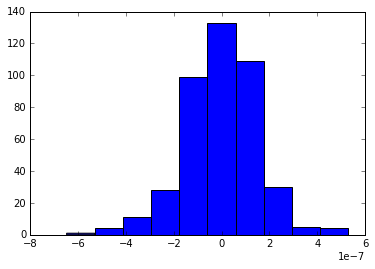

In [141]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

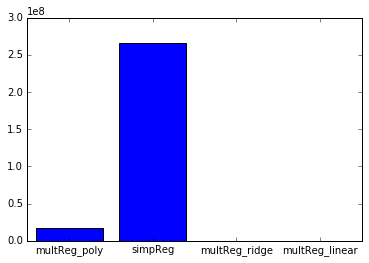

In [142]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()